## **Importing Libraries**

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix

plt.rc('figure',figsize=(18,9))
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE


**Loading Data**

In [14]:
c_data=pd.read_csv('/content/BankChurners.csv')
c_data.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [15]:
c_data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [16]:
c_data = c_data.drop(columns=c_data.columns[-2:])
c_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


**Exploratory Data Analysis**

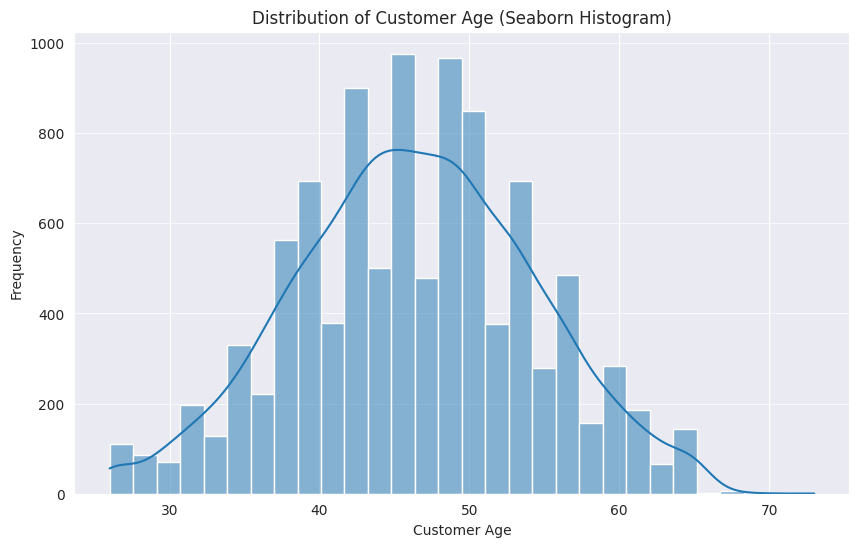

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(c_data['Customer_Age'], kde=True, bins=30)
plt.title('Distribution of Customer Age (Seaborn Histogram)')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

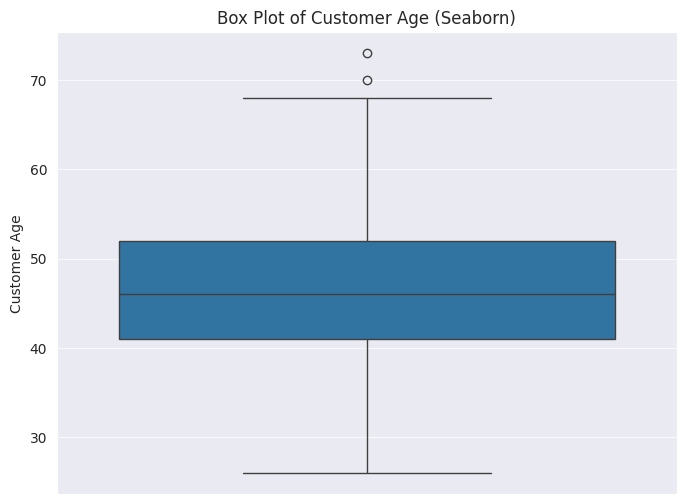

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=c_data['Customer_Age'])
plt.title('Box Plot of Customer Age (Seaborn)')
plt.ylabel('Customer Age')
plt.grid(axis='y', alpha=0.75)
plt.show()

customer age is normally distributed

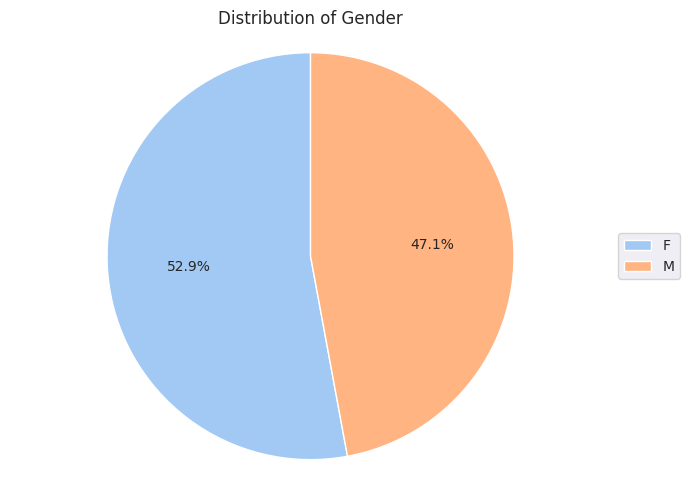

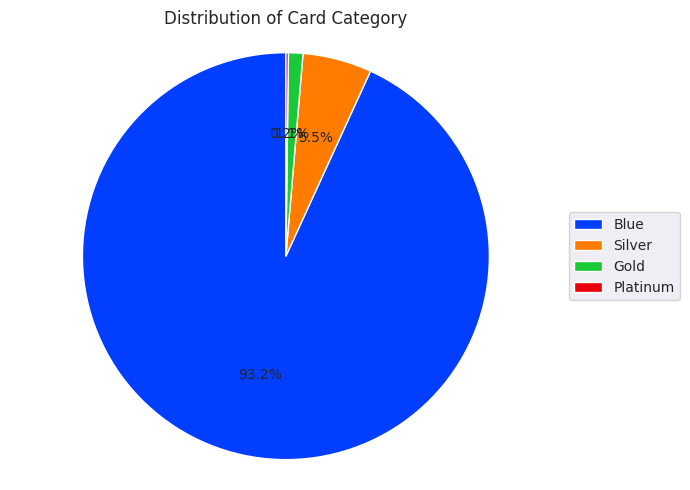

In [26]:
gender_counts = c_data['Gender'].value_counts()
plt.figure(figsize=(7, 5)) # Adjusted figure size to make space for legend
plt.pie(gender_counts, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Gender')
plt.axis('equal')
plt.legend(labels=gender_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

card_category_counts = c_data['Card_Category'].value_counts()
plt.figure(figsize=(7, 5)) # Adjusted figure size to make space for legend
plt.pie(card_category_counts, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('bright'))
plt.title('Distribution of Card Category')
plt.axis('equal')
plt.legend(labels=card_category_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

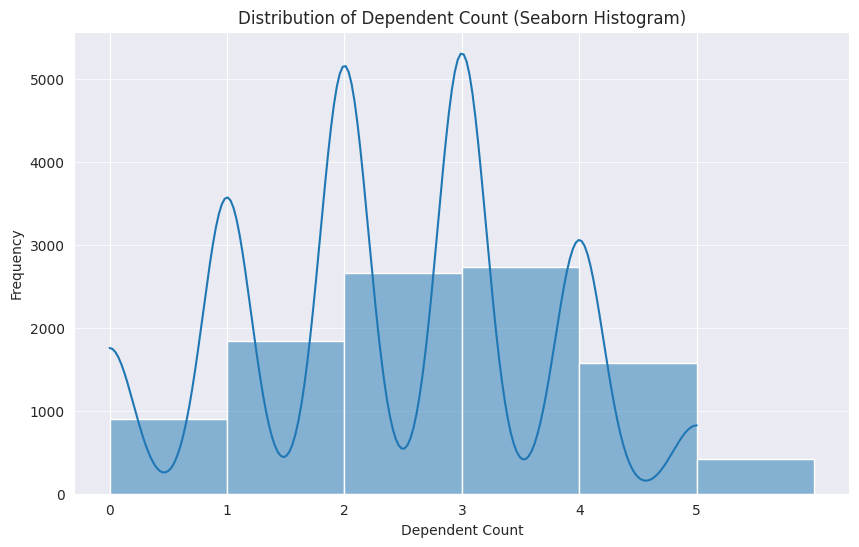

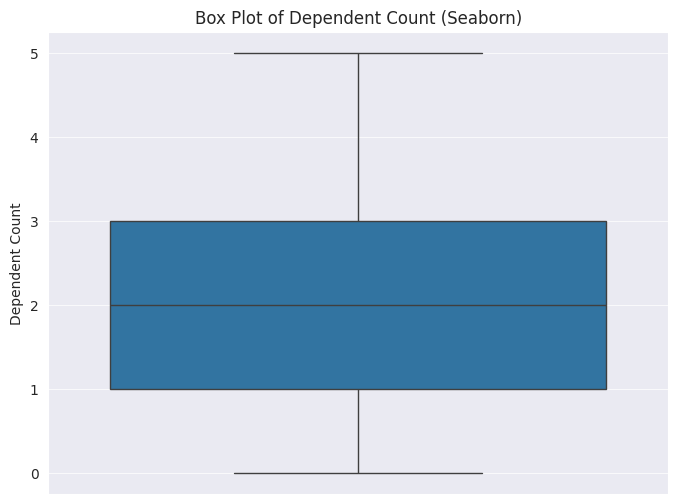

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(c_data['Dependent_count'], kde=True, bins=range(int(c_data['Dependent_count'].min()), int(c_data['Dependent_count'].max()) + 2))
plt.title('Distribution of Dependent Count (Seaborn Histogram)')
plt.xlabel('Dependent Count')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks(range(int(c_data['Dependent_count'].min()), int(c_data['Dependent_count'].max()) + 1))
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=c_data['Dependent_count'])
plt.title('Box Plot of Dependent Count (Seaborn)')
plt.ylabel('Dependent Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

Distribution is fair with slight right skewness

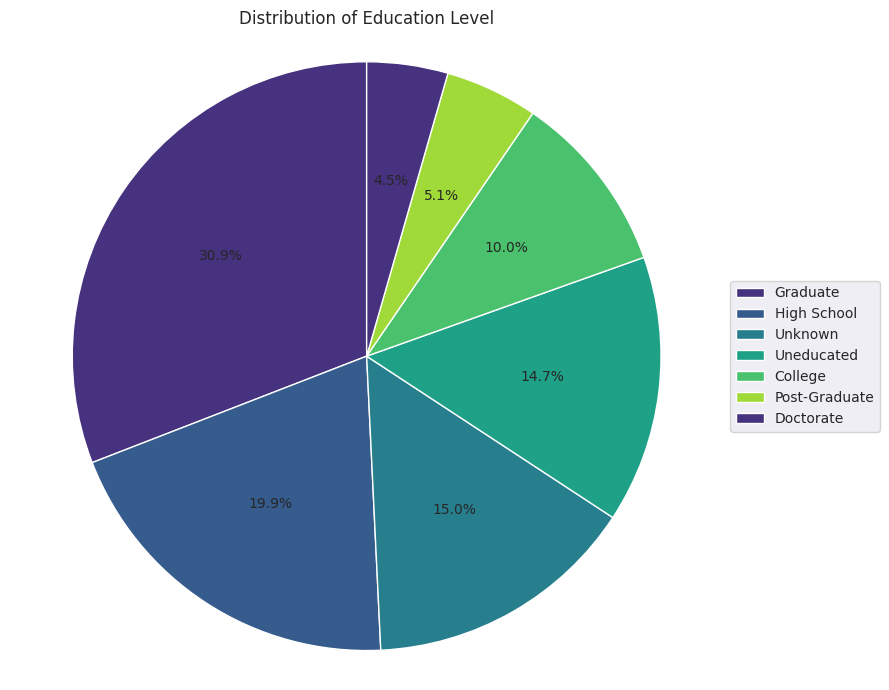

In [30]:
education_counts = c_data['Education_Level'].value_counts()
plt.figure(figsize=(9, 7)) # Adjusted figure size to make space for legend
plt.pie(education_counts, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of Education Level')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=education_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

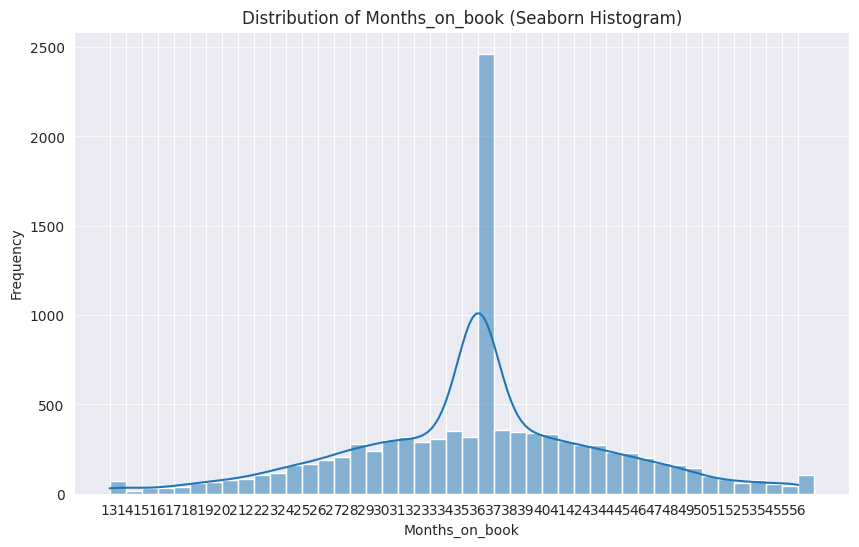

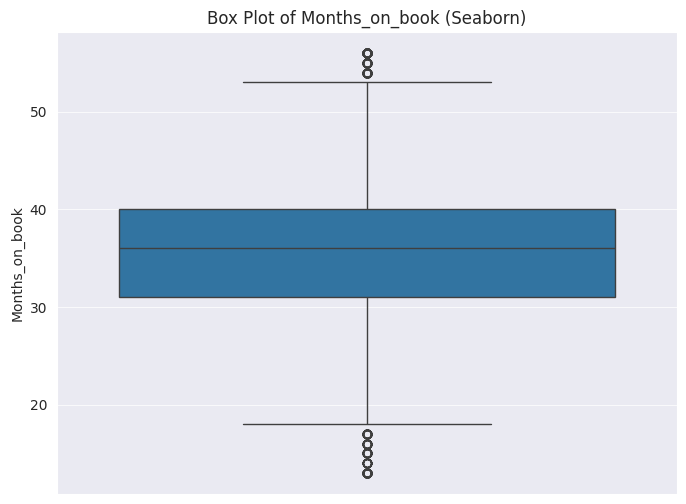

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(c_data['Months_on_book'], kde=True, bins=range(int(c_data['Months_on_book'].min()), int(c_data['Months_on_book'].max()) + 2))
plt.title('Distribution of Months_on_book (Seaborn Histogram)')
plt.xlabel('Months_on_book')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks(range(int(c_data['Months_on_book'].min()), int(c_data['Months_on_book'].max()) + 1))
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=c_data['Months_on_book'])
plt.title('Box Plot of Months_on_book (Seaborn)')
plt.ylabel('Months_on_book')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [32]:
kurtosis_value = c_data['Months_on_book'].kurt()
print(f"Kurtosis for Months_on_book: {kurtosis_value}")

Kurtosis for Months_on_book: 0.40010012019986707


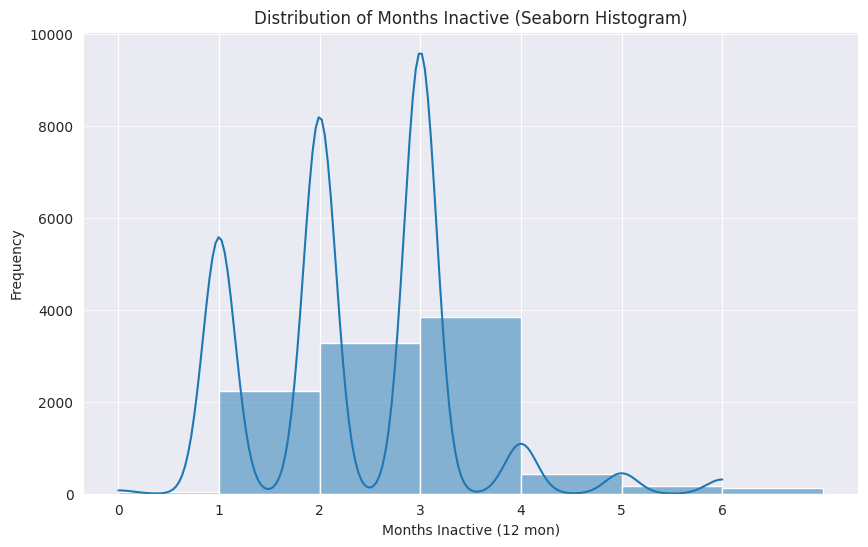

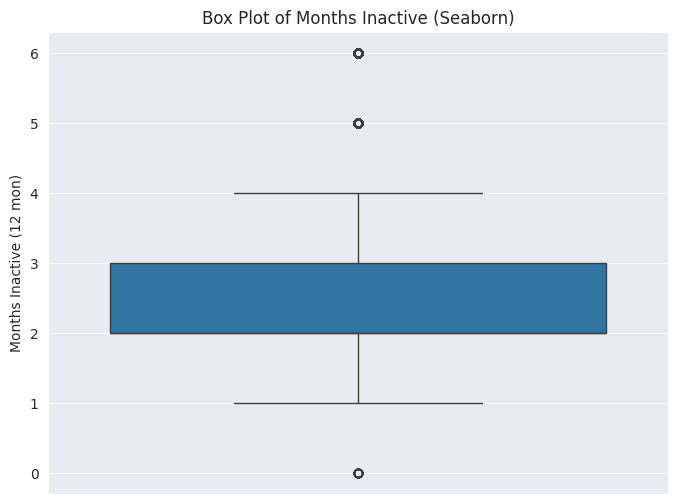

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(c_data['Months_Inactive_12_mon'], kde=True, bins=range(int(c_data['Months_Inactive_12_mon'].min()), int(c_data['Months_Inactive_12_mon'].max()) + 2))
plt.title('Distribution of Months Inactive (Seaborn Histogram)')
plt.xlabel('Months Inactive (12 mon)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks(range(int(c_data['Months_Inactive_12_mon'].min()), int(c_data['Months_Inactive_12_mon'].max()) + 1))
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=c_data['Months_Inactive_12_mon'])
plt.title('Box Plot of Months Inactive (Seaborn)')
plt.ylabel('Months Inactive (12 mon)')
plt.grid(axis='y', alpha=0.75)
plt.show()

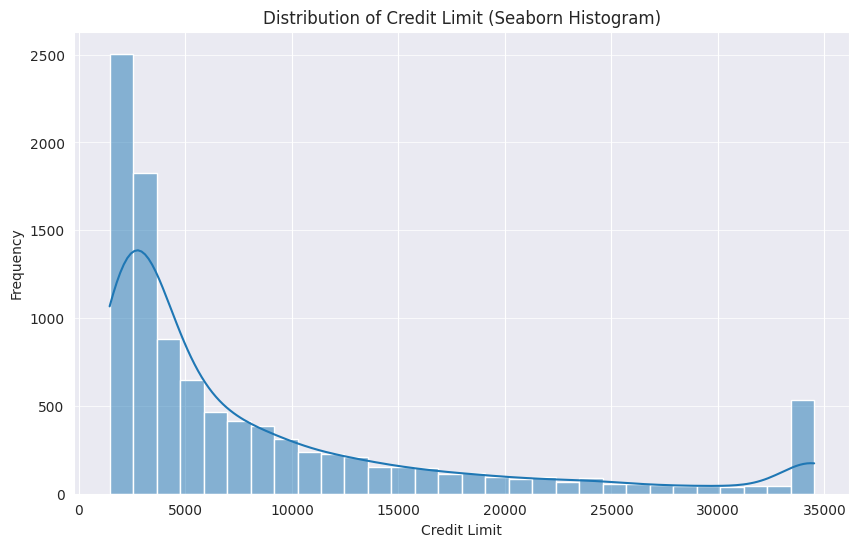

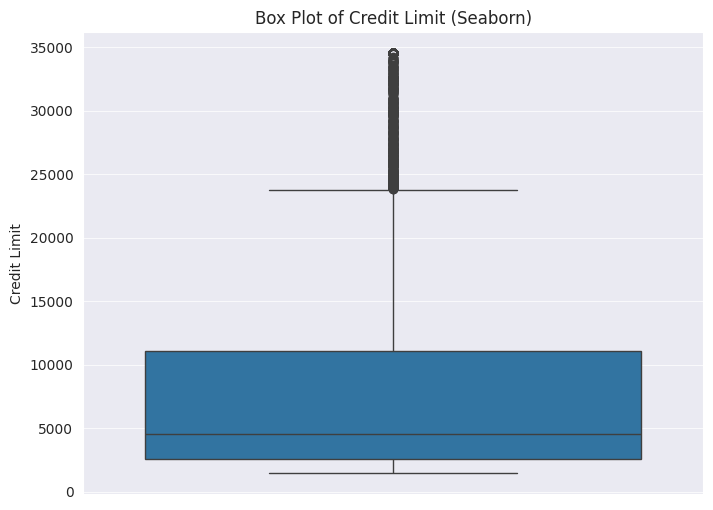

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(c_data['Credit_Limit'], kde=True, bins=30)
plt.title('Distribution of Credit Limit (Seaborn Histogram)')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=c_data['Credit_Limit'])
plt.title('Box Plot of Credit Limit (Seaborn)')
plt.ylabel('Credit Limit')
plt.grid(axis='y', alpha=0.75)
plt.show()

since it is right skewed we use box cox

Lambda value for Box-Cox transformation: -0.2875


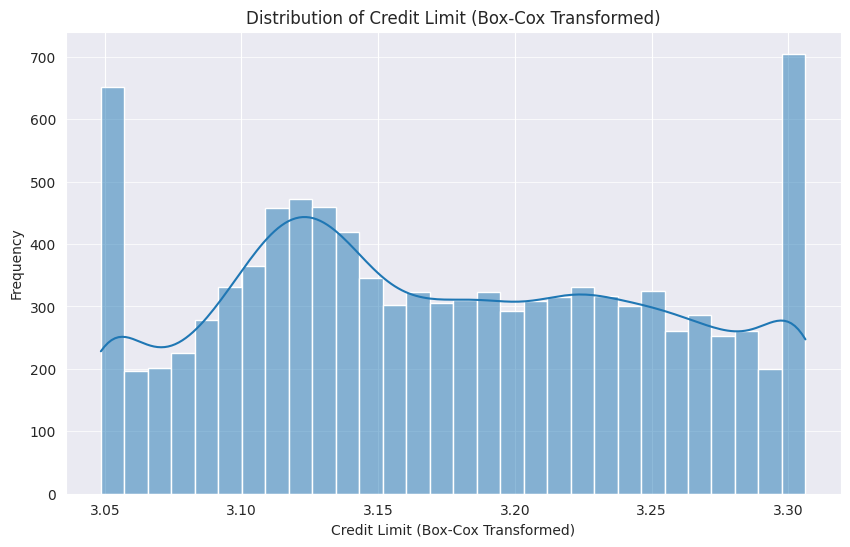

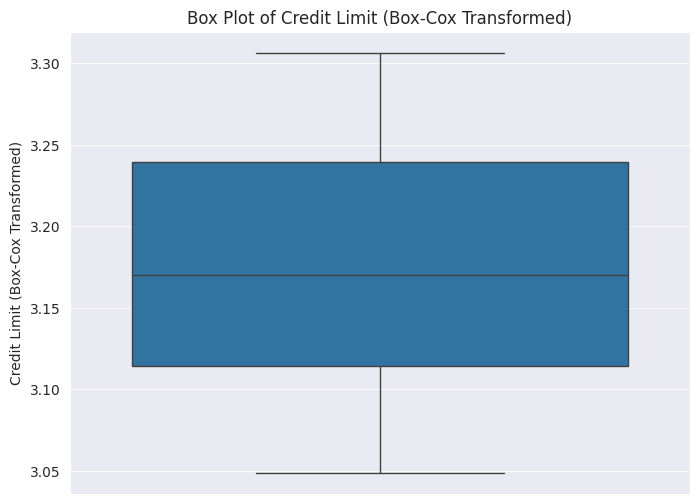

In [35]:
from scipy.stats import boxcox

# Apply Box-Cox transformation to 'Credit_Limit'
c_data['Credit_Limit_BoxCox'], lambda_val = boxcox(c_data['Credit_Limit'])

print(f"Lambda value for Box-Cox transformation: {lambda_val:.4f}")

# Plot histogram of transformed Credit_Limit
plt.figure(figsize=(10, 6))
sns.histplot(c_data['Credit_Limit_BoxCox'], kde=True, bins=30)
plt.title('Distribution of Credit Limit (Box-Cox Transformed)')
plt.xlabel('Credit Limit (Box-Cox Transformed)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot box plot of transformed Credit_Limit
plt.figure(figsize=(8, 6))
sns.boxplot(y=c_data['Credit_Limit_BoxCox'])
plt.title('Box Plot of Credit Limit (Box-Cox Transformed)')
plt.ylabel('Credit Limit (Box-Cox Transformed)')
plt.grid(axis='y', alpha=0.75)
plt.show()

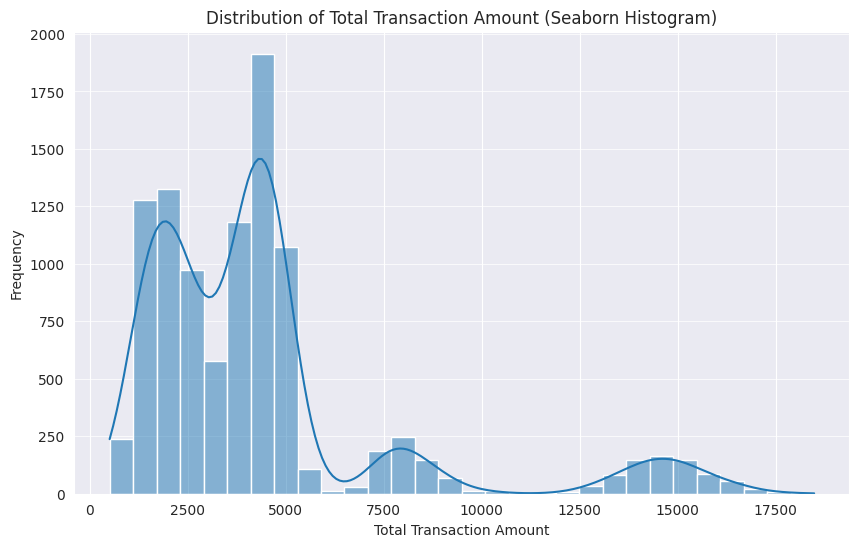

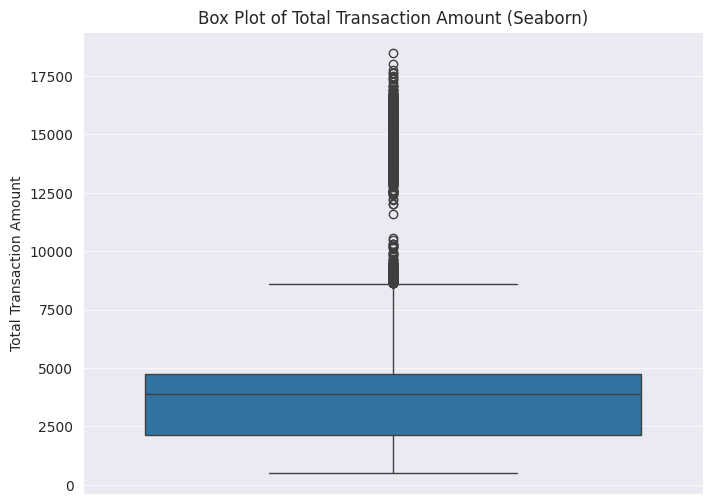

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(c_data['Total_Trans_Amt'], kde=True, bins=30)
plt.title('Distribution of Total Transaction Amount (Seaborn Histogram)')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=c_data['Total_Trans_Amt'])
plt.title('Box Plot of Total Transaction Amount (Seaborn)')
plt.ylabel('Total Transaction Amount')
plt.grid(axis='y', alpha=0.75)
plt.show()

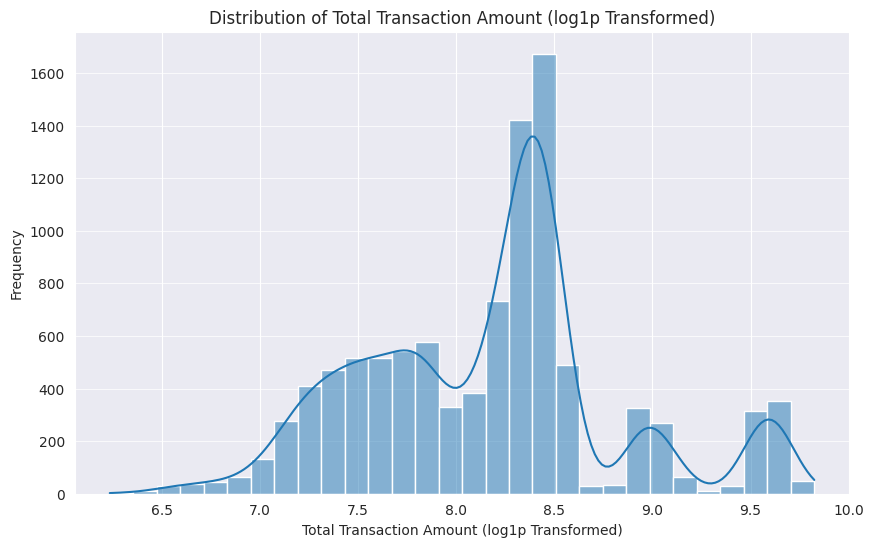

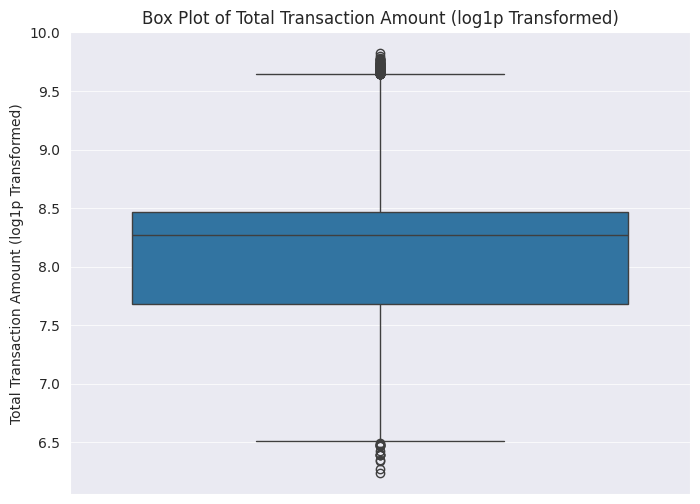

In [37]:
c_data['Total_Trans_Amt_log1p'] = np.log1p(c_data['Total_Trans_Amt'])

plt.figure(figsize=(10, 6))
sns.histplot(c_data['Total_Trans_Amt_log1p'], kde=True, bins=30)
plt.title('Distribution of Total Transaction Amount (log1p Transformed)')
plt.xlabel('Total Transaction Amount (log1p Transformed)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=c_data['Total_Trans_Amt_log1p'])
plt.title('Box Plot of Total Transaction Amount (log1p Transformed)')
plt.ylabel('Total Transaction Amount (log1p Transformed)')
plt.grid(axis='y', alpha=0.75)
plt.show()

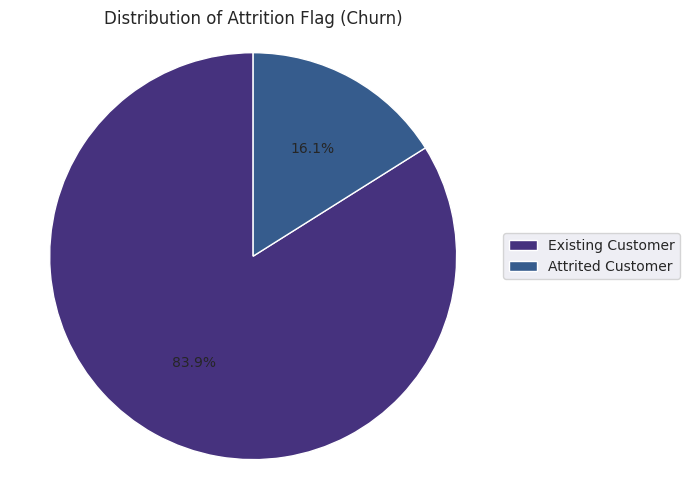

In [38]:
churn_counts = c_data['Attrition_Flag'].value_counts()
plt.figure(figsize=(7, 5))
plt.pie(churn_counts, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of Attrition Flag (Churn)')
plt.axis('equal')
plt.legend(labels=churn_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

only 16% is attrited customers so we can use smote to upsample

In [39]:
# Convert 'Attrition_Flag' to numerical (0 and 1)
c_data['Attrition_Flag'] = c_data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Identify categorical columns for one-hot encoding (excluding 'Attrition_Flag' and already processed numericals)
categorical_cols = c_data.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding
c_data_encoded = pd.get_dummies(c_data, columns=categorical_cols, drop_first=True)

print("Shape of DataFrame after one-hot encoding:", c_data_encoded.shape)
c_data_encoded.head()

Shape of DataFrame after one-hot encoding: (10127, 36)


,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,3,39,5,1,3,12691.0,777,...,False,False,False,True,False,False,False,False,False,False
1,818770008,0,49,5,44,6,1,2,8256.0,864,...,True,False,False,False,False,True,False,False,False,False
2,713982108,0,51,3,36,4,1,0,3418.0,0,...,False,False,False,False,True,False,False,False,False,False
3,769911858,0,40,4,34,3,4,1,3313.0,2517,...,False,True,False,False,False,True,False,False,False,False
4,709106358,0,40,3,21,5,1,0,4716.0,0,...,False,False,False,True,False,False,False,False,False,False


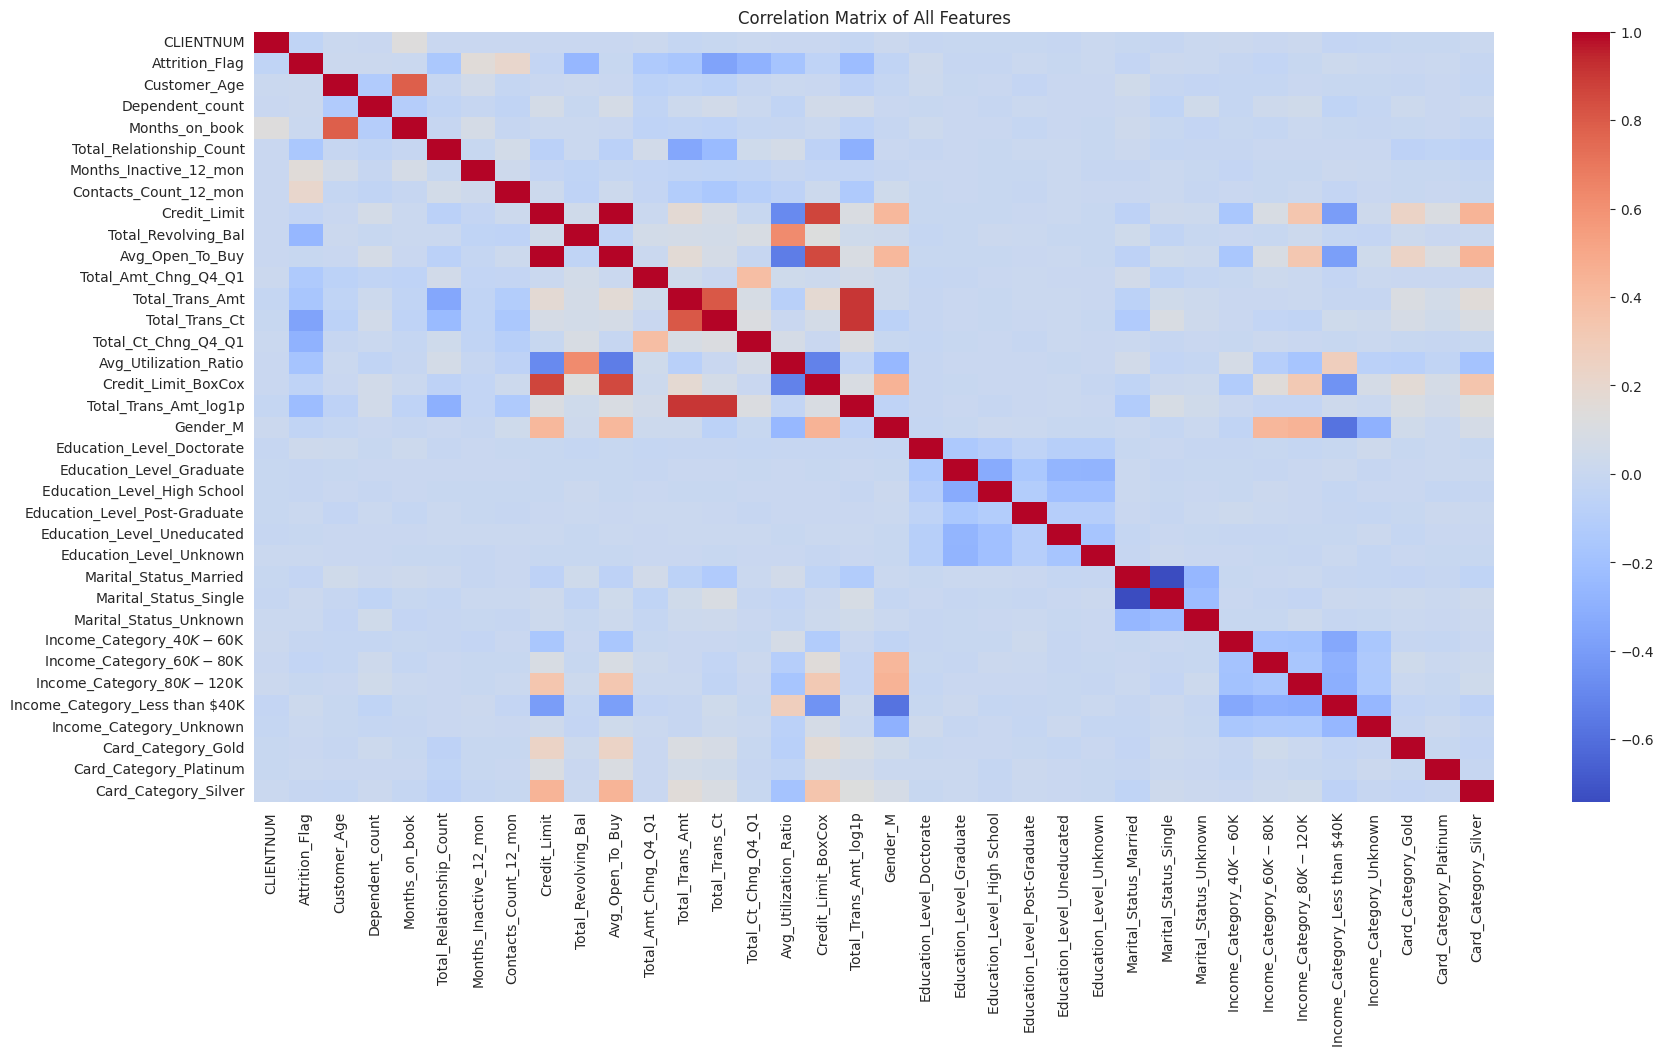

In [41]:
plt.figure(figsize=(20, 10))
sns.heatmap(c_data_encoded.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features')
plt.show()

In [42]:
X = c_data_encoded.drop('Attrition_Flag', axis=1)
y = c_data_encoded['Attrition_Flag']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Shape of original X:", X.shape)
print("Shape of resampled X:", X_resampled.shape)
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

Shape of original X: (10127, 35)
Shape of resampled X: (17000, 35)
Class distribution after SMOTE:
Attrition_Flag
0    8500
1    8500
Name: count, dtype: int64


In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

print("Features scaled successfully. Shape of X_scaled:", X_scaled.shape)

Features scaled successfully. Shape of X_scaled: (17000, 35)


**Reasoning**:
Now that the features are scaled, the next logical step is to apply PCA to the scaled data to identify the principal components and analyze their explained variance. This will help in determining the optimal number of components to retain for dimensionality reduction.



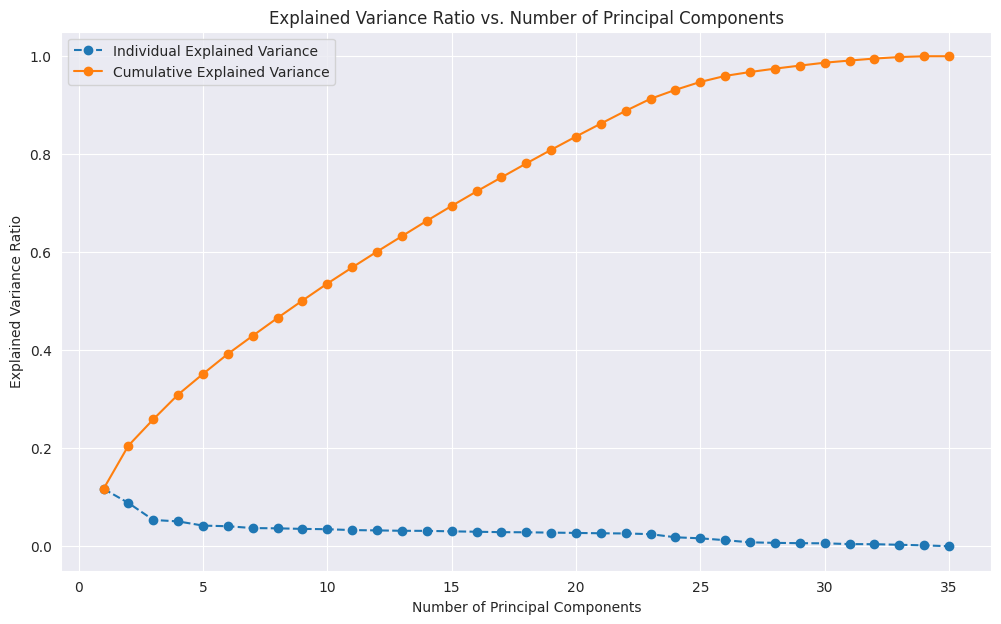

PCA applied and explained variance plotted successfully.


In [44]:
pca = PCA(n_components=None)
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(12, 7))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', label='Cumulative Explained Variance')

plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.legend()
plt.show()

print("PCA applied and explained variance plotted successfully.")

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split into training and testing sets successfully.
Shape of X_train: (13600, 35)
Shape of X_test: (3400, 35)
Shape of y_train: (13600,)
Shape of y_test: (3400,)


Model Selection

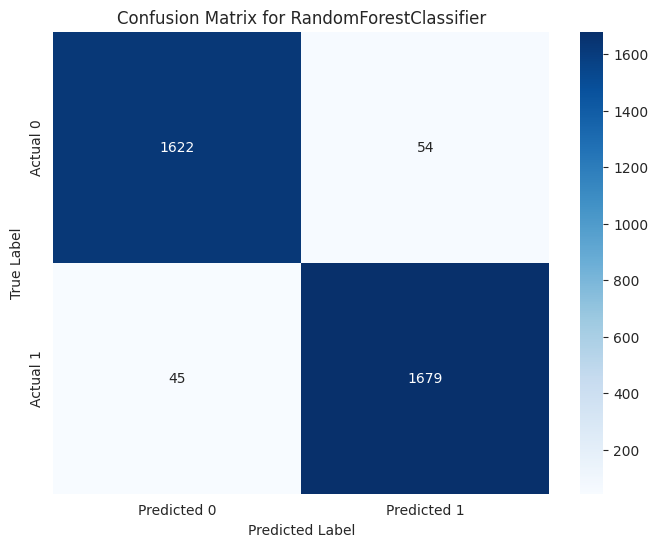

In [46]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

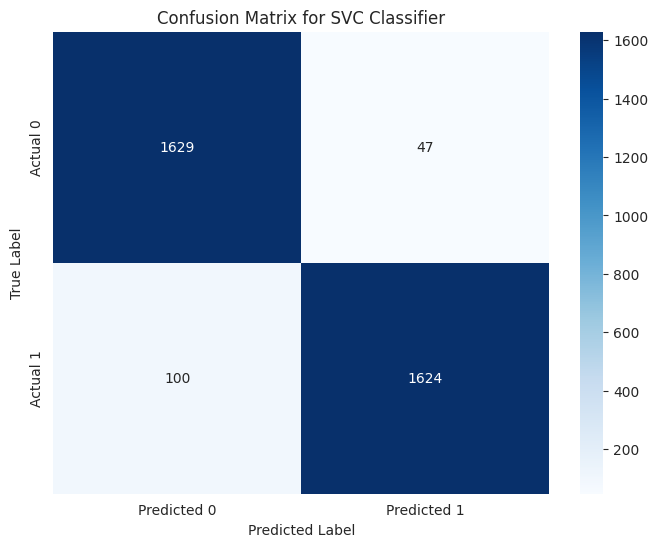

In [47]:
svc_classifier = SVC(random_state=42)
svc_classifier.fit(X_train, y_train)

y_pred_svm = svc_classifier.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVC Classifier')
plt.show()

In [48]:
f1_rf = f1(y_test, y_pred_rf)
f1_svm = f1(y_test, y_pred_svm)

print(f"F1 Score for RandomForestClassifier: {f1_rf:.4f}")
print(f"F1 Score for SVC Classifier: {f1_svm:.4f}")

F1 Score for RandomForestClassifier: 0.9714
F1 Score for SVC Classifier: 0.9567


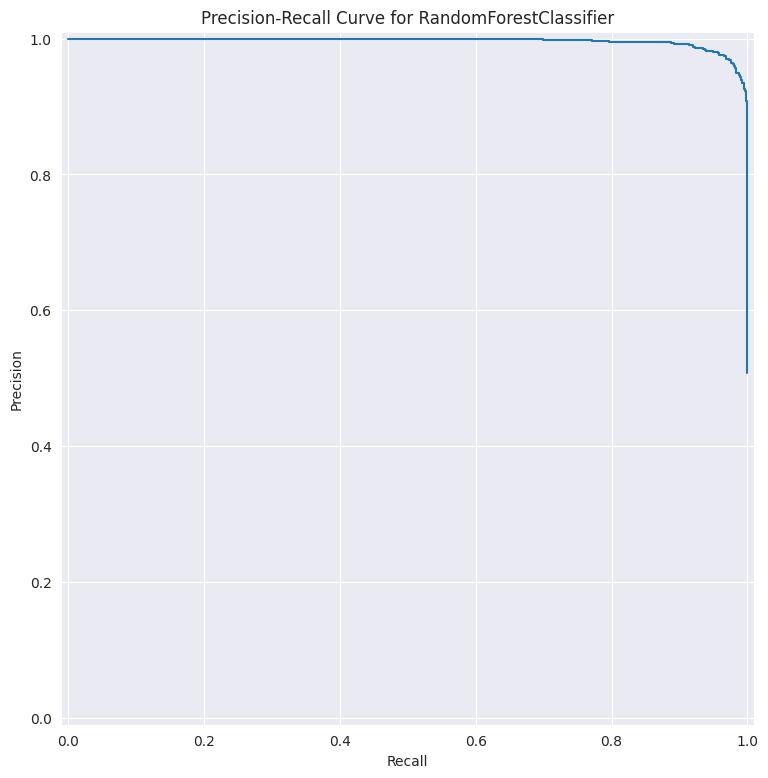

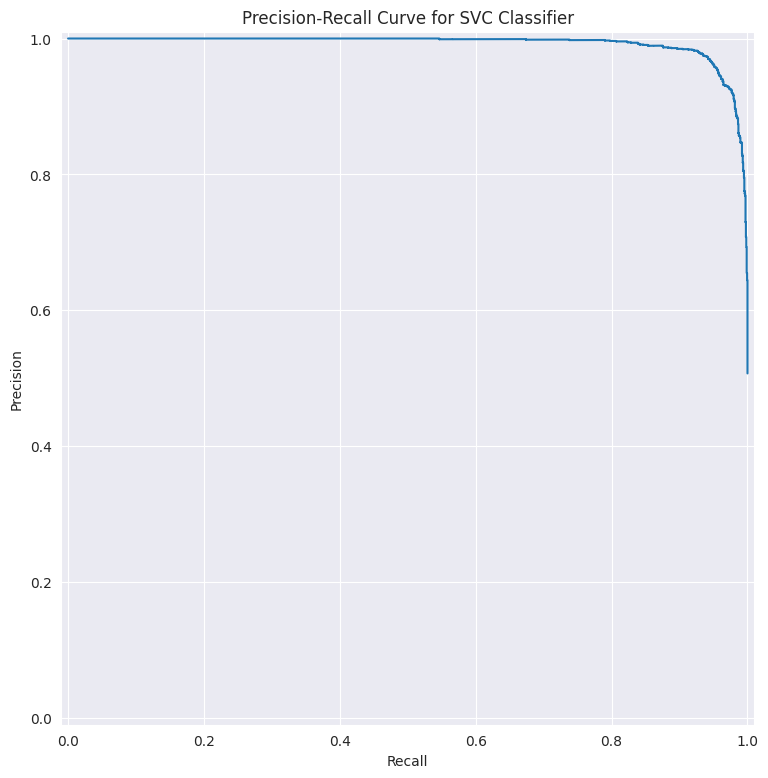

In [49]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# For RandomForestClassifier
y_scores_rf = rf_classifier.predict_proba(X_test)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores_rf)
disp_rf = PrecisionRecallDisplay(precision=precision_rf, recall=recall_rf)
disp_rf.plot()
plt.title('Precision-Recall Curve for RandomForestClassifier')
plt.show()

# For SVC Classifier (using decision_function as predict_proba is not default for SVC)
y_scores_svm = svc_classifier.decision_function(X_test)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_scores_svm)
disp_svm = PrecisionRecallDisplay(precision=precision_svm, recall=recall_svm)
disp_svm.plot()
plt.title('Precision-Recall Curve for SVC Classifier')
plt.show()